In [1]:
import plotly.express as px

In [22]:
import json
with open('../data/results/total_calorie_estimation_v1.json') as f:
    result1 = json.load(f)

with open('../data/results/total_calorie_estimation_v2.json') as f:
    result2 = json.load(f)

In [23]:
result1.extend(result2)

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame.from_dict(result1)

In [26]:
df

,id,name,usda_calorie_estimation,gpt4_calorie_estimation
0,14,Mediterranean Chickpea Salad,1921.60,1400
1,15,Mediterranean Stuffed Mushrooms,503.92,625
2,17,Tangy Greek Yogurt Dressing,480.66,368
3,16,Hearty Vegetable Lentil Soup,1045.53,1055
4,13,Green Veggie Diabetic-Friendly Smoothie,295.84,264
5,11,Spinach and Mushroom Egg White Frittata,533.33,410
6,20,Cucumber Mint Infused Water,49.58,53
7,18,Zucchini Noodles with Pesto and Cherry Tomatoes,918.10,944
8,19,Zucchini Noodles with Pesto and Cherry Tomatoes,802.58,851
9,63,Low-Cholesterol Vanilla Ice Cream,1804.44,1334


In [6]:
df = df.rename(columns={'name':'recipe_name'})

In [23]:
pd.options.plotting.backend = "plotly"

In [44]:
# Plot 
fig = px.line(df, x='recipe_name', y='usda_calorie_estimation', title='Total Calories Comparison',width=800, height=600)
fig.add_scatter(x=df['recipe_name'], y=df['gpt4_calorie_estimation'], mode='lines', name='gpt4_calorie_estimation')
fig.show()


In [21]:
df = df.filter(['recipe_name','usda_calorie_estimation','gpt4_calorie_estimation'])

In [46]:
# Reshape the DataFrame for easier plotting and update column names for clarity in the legend
df_long = pd.melt(df, id_vars='recipe_name', var_name='source', value_name='calories')
df_long['source'] = df_long['source'].map({
    'usda_calorie_estimation': 'USDA Food API',
    'gpt4_calorie_estimation': 'GPT-4'
})


In [47]:
df_long['calories'] = round(df_long['calories'])

In [49]:
df_long['calories'] = df_long['calories'].astype('int')

In [51]:
df_long

,recipe_name,source,calories
0,Mediterranean Chickpea Salad,USDA Food API,1922
1,Mediterranean Stuffed Mushrooms,USDA Food API,504
2,Tangy Greek Yogurt Dressing,USDA Food API,481
3,Hearty Vegetable Lentil Soup,USDA Food API,1046
4,Green Veggie Diabetic-Friendly Smoothie,USDA Food API,296
5,Spinach and Mushroom Egg White Frittata,USDA Food API,533
6,Cucumber Mint Infused Water,USDA Food API,50
7,Zucchini Noodles with Pesto and Cherry Tomatoes,USDA Food API,918
8,Zucchini Noodles with Pesto and Cherry Tomatoes,USDA Food API,803
9,Low-Cholesterol Vanilla Ice Cream,USDA Food API,1804


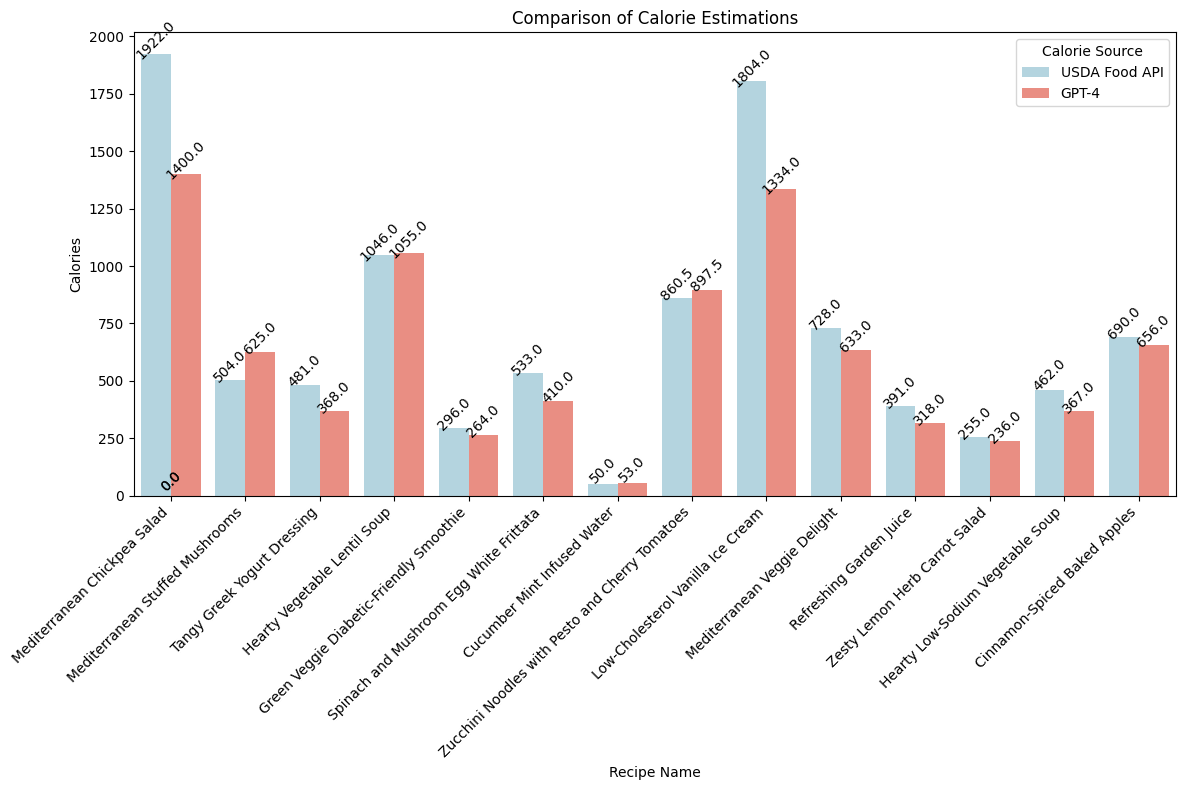

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a dodged bar plot with color customization
plt.figure(figsize=(12, 8))
palette = {"USDA Food API": "lightblue", "GPT-4": "salmon"}
plot = sns.barplot(data=df_long, x='recipe_name', y='calories', hue='source', palette=palette, edgecolor='none', errorbar=('ci', False))

# Annotate each bar with the value
for p in plot.patches:
    height = p.get_height()
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points',
                   rotation=45)

plt.title('Comparison of Calorie Estimations')
plt.xlabel('Recipe Name')
plt.ylabel('Calories')
plt.legend(title='Calorie Source')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Save the plot to a file
plot_figure = plot.get_figure()
plot_figure.savefig("../data/results/calories_comparison.png")  # Save the plot as a PNG file

# Show the plot
plt.show()

In [8]:
df

,id,recipe_name,usda_calorie_estimation,gpt4_calorie_estimation
0,14,Mediterranean Chickpea Salad,1921.60,1400
1,15,Mediterranean Stuffed Mushrooms,503.92,625
2,17,Tangy Greek Yogurt Dressing,480.66,368
3,16,Hearty Vegetable Lentil Soup,1045.53,1055
4,13,Green Veggie Diabetic-Friendly Smoothie,295.84,264
5,11,Spinach and Mushroom Egg White Frittata,533.33,410
6,20,Cucumber Mint Infused Water,49.58,53
7,18,Zucchini Noodles with Pesto and Cherry Tomatoes,918.10,944
8,19,Zucchini Noodles with Pesto and Cherry Tomatoes,802.58,851
9,63,Low-Cholesterol Vanilla Ice Cream,1804.44,1334


RMSE Calculation

In [9]:
((df.usda_calorie_estimation - df.gpt4_calorie_estimation) ** 2).mean() ** .5

194.06806944987113

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt


In [29]:
mean_absolute_percentage_error(list(df['usda_calorie_estimation'].values), list(df['gpt4_calorie_estimation'].values))

0.14381932586094465

In [12]:
sqrt(mean_squared_error(list(df['usda_calorie_estimation'].values), list(df['gpt4_calorie_estimation'].values))) 

194.06806944987113

In [6]:
import json
import pandas as pd

In [4]:
with open('../data/results/recipes_similarity.json') as f:
    recipes_similarity = json.load(f)

In [7]:
df_recipe = pd.DataFrame.from_dict(recipes_similarity)

In [8]:
df_recipe

,id,recipe_name,ingredients_similarity,directions_similarity,gpt4_1106_recipe_total_calories,original_recpie_total_calories
0,8,Chicken sausage meatballs,0.716133,0.794308,338,164
1,9,Fresh fruit kebabs,0.723845,0.646554,68,190
2,11,Fresh fruit smoothie,0.676898,0.638365,155,72
3,10,Chicken fajitas,0.878468,0.747718,251,220
4,4,Baked oatmeal,0.763212,0.716596,217,204
5,5,Beef and vegetable kebabs,0.746106,0.776103,237,324
6,7,Beef fajitas,0.737835,0.663152,287,242
7,6,Black bean quesadillas,0.788097,0.861878,246,292
8,2,Almond crusted chicken,0.831689,0.860326,323,247
9,3,Balsamic feta chicken,0.845385,0.726970,237,271


In [36]:
fig = px.line(df_recipe, x='recipe_name', y='ingredients_similarity')
fig.show()

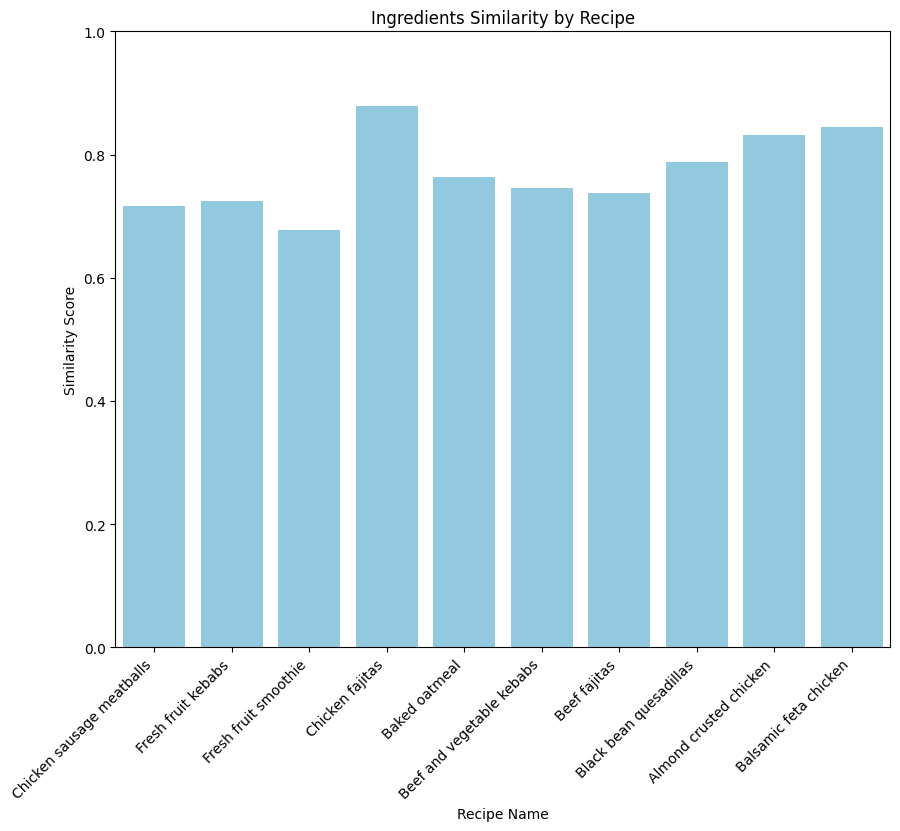

In [66]:
plt.figure(figsize=(10, 8))
bar_plot=sns.barplot(data=df_recipe, x='recipe_name', y='ingredients_similarity',  color='skyblue')
plt.title('Ingredients Similarity by Recipe')
plt.xlabel('Recipe Name')
plt.ylabel('Similarity Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(0, 1)  # Assuming similarity score ranges from 0 to 1

# # Save the plot to a file
# plot_figure = bar_plot.get_figure()
# plot_figure.savefig("../data/results/Ingredients_Similarity_Plot.png") 
# Show the plot
plt.show()

In [37]:
fig = px.line(df_recipe, x='recipe_name', y='directions_similarity')
fig.show()

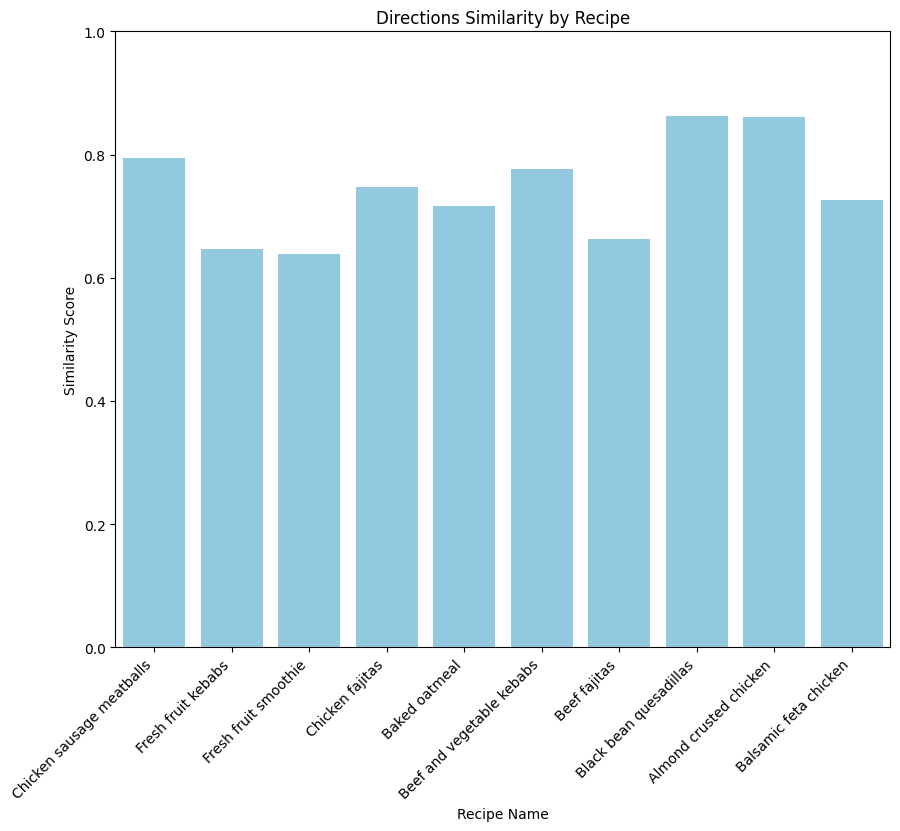

In [67]:
plt.figure(figsize=(10, 8))
bar_plot=sns.barplot(data=df_recipe, x='recipe_name', y='directions_similarity',  color='skyblue')
plt.title('Directions Similarity by Recipe')
plt.xlabel('Recipe Name')
plt.ylabel('Similarity Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(0, 1)  # Assuming similarity score ranges from 0 to 1

# # Save the plot to a file
# plot_figure = bar_plot.get_figure()
# plot_figure.savefig("../data/results/Ingredients_Similarity_Plot.png") 
# Show the plot
plt.show()

In [11]:
df_nutrient_calories = df_recipe.filter(['recipe_name','gpt4_1106_recipe_total_calories','original_recpie_total_calories'])

In [17]:
df_long = pd.melt(df_nutrient_calories, id_vars='recipe_name', var_name='source', value_name='calories')
df_long['source'] = df_long['source'].map({
    'original_recpie_total_calories': 'Dataset',
    'gpt4_1106_recipe_total_calories': 'GPT-4'
})

In [18]:
df_long

,recipe_name,source,calories
0,Chicken sausage meatballs,GPT-4,338
1,Fresh fruit kebabs,GPT-4,68
2,Fresh fruit smoothie,GPT-4,155
3,Chicken fajitas,GPT-4,251
4,Baked oatmeal,GPT-4,217
5,Beef and vegetable kebabs,GPT-4,237
6,Beef fajitas,GPT-4,287
7,Black bean quesadillas,GPT-4,246
8,Almond crusted chicken,GPT-4,323
9,Balsamic feta chicken,GPT-4,237


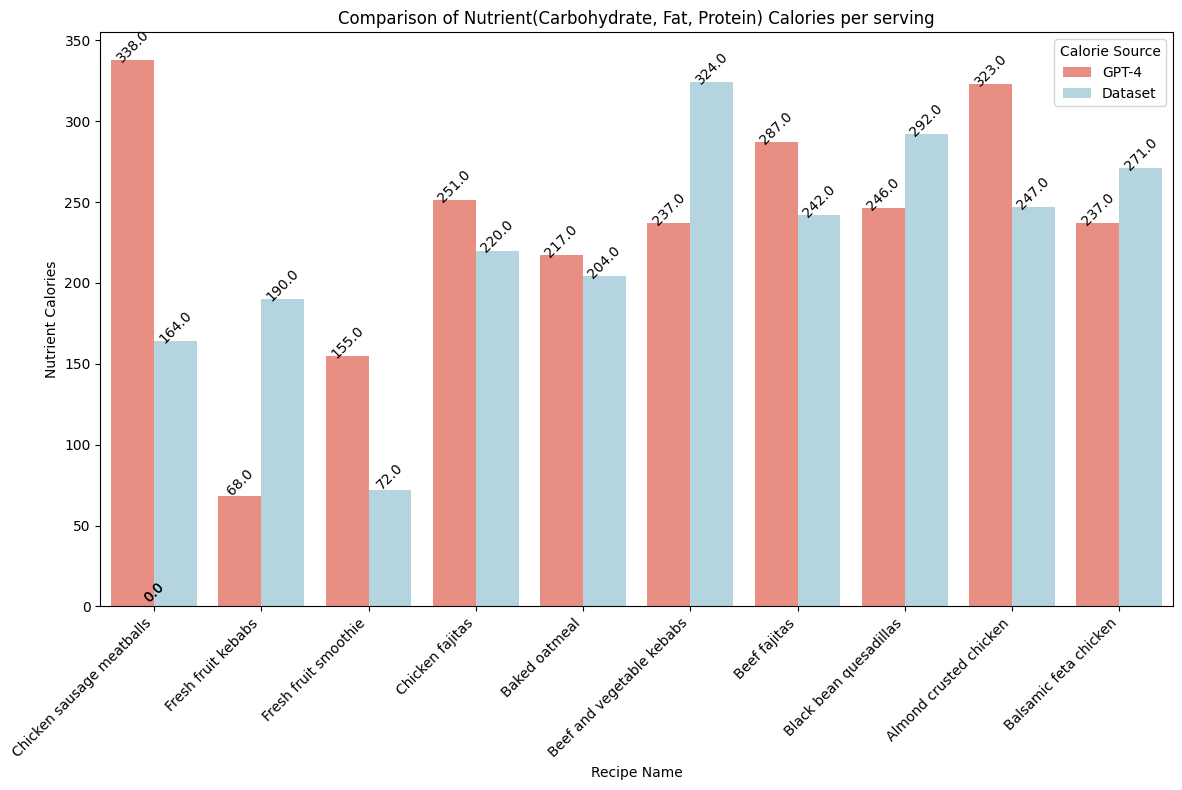

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a dodged bar plot with color customization
plt.figure(figsize=(12, 8))
palette = {"Dataset": "lightblue", "GPT-4": "salmon"}
plot = sns.barplot(data=df_long, x='recipe_name', y='calories', hue='source', palette=palette, edgecolor='none', errorbar=('ci', False))

# Annotate each bar with the value
for p in plot.patches:
    height = p.get_height()
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points',
                   rotation=45)

plt.title('Comparison of Nutrient(Carbohydrate, Fat, Protein) Calories per serving')
plt.xlabel('Recipe Name')
plt.ylabel('Nutrient Calories')
plt.legend(title='Calorie Source')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Save the plot to a file
plot_figure = plot.get_figure()
plot_figure.savefig("../data/results/nutrient_calories_comparison.png")  # Save the plot as a PNG file

# Show the plot
plt.show()

In [151]:
with open('../data/scrapped_recipes/bell_pepper.json') as f:
    data = json.load(f)

In [152]:
records = []

In [153]:
for item in data['recpies_authenticity']:
    temp = []
    for matched_recipe in item['matched_recipes']:
        temp.append(item['recipe_name'])
        temp.append(matched_recipe['recipe_name'])
        temp.append(matched_recipe['matched_percentage'])
        records.append(temp)
        temp = []
    

In [155]:
df_data = pd.DataFrame(records, columns=['gpt4_recipe', 'dataset_recipe','matched_ingredient_percentage'])
df_data=df_data.drop_duplicates(subset=['gpt4_recipe', 'dataset_recipe'])

In [158]:
new_df = df_data.pivot(index='gpt4_recipe', columns='dataset_recipe')['matched_ingredient_percentage'].fillna(0)


In [159]:
new_df

dataset_recipe,roasted red bell pepper pineapple salsa
gpt4_recipe,
stuffed bell peppers,29.411765
stuffed bell peppers with quinoa and black beans,26.666667


In [163]:
import plotly.express as px
fig = px.imshow(new_df, x=new_df.columns, y=new_df.index)
fig.update_layout(width=600,height=400)
fig.show()